<a href="https://colab.research.google.com/github/marianna718/Sentiment_Analysis/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

data source: https://www.kaggle.com/sid321axn/amazon-alexa-reviews/kernels

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from jupyterthemes import jtplot
# jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
# setting the style of the notebook to be monokai theme
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the data
tweets_df = pd.read_csv("/content/drive/MyDrive/X sentiment analysis /twitter.csv")

In [4]:
tweets_df

id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]

In [5]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [6]:
tweets_df.describe()

id         label
count  31962.000000  31962.000000
mean   15981.500000      0.070146
std     9226.778988      0.255397
min        1.000000      0.000000
25%     7991.250000      0.000000
50%    15981.500000      0.000000
75%    23971.750000      0.000000
max    31962.000000      1.000000

In [7]:
tweets_df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [8]:
# Drop the 'id' column
tweets_df = tweets_df.drop(['id'], axis=1)

<Axes: >

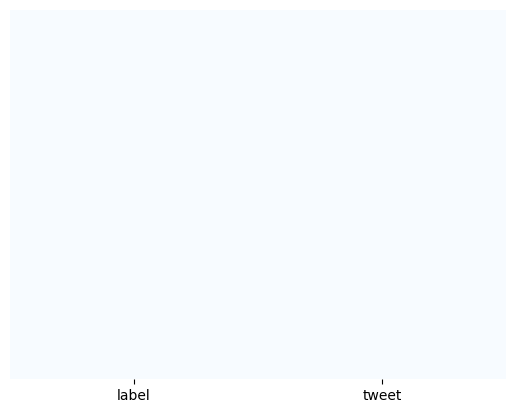

In [9]:
 sns.heatmap(tweets_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

<Axes: xlabel='label'>

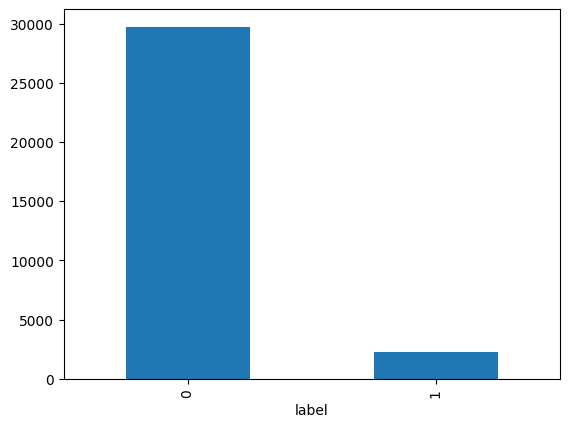

In [10]:
# Plot the histogram
tweets_df['label'].value_counts().plot(kind='bar')

<Axes: xlabel='label', ylabel='count'>

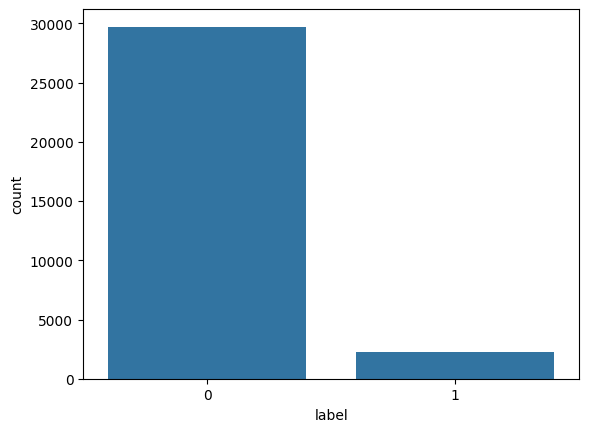

In [11]:
# Plot countplot
sns.countplot(x = tweets_df['label'])

In [12]:
# Let's get the length of the messages
tweets_df['length'] = tweets_df['tweet'].apply(len)

In [13]:
tweets_df

label                                              tweet  length
0          0   @user when a father is dysfunctional and is s...     102
1          0  @user @user thanks for #lyft credit i can't us...     122
2          0                                bihday your majesty      21
3          0  #model   i love u take with u all the time in ...      86
4          0             factsguide: society now    #motivation      39
...      ...                                                ...     ...
31957      0  ate @user isz that youuu?ðððððð...      68
31958      0    to see nina turner on the airwaves trying to...     131
31959      0  listening to sad songs on a monday morning otw...      63
31960      1  @user #sikh #temple vandalised in in #calgary,...      67
31961      0                   thank you @user for you follow        32

[31962 rows x 3 columns]

In [14]:
tweets_df.describe()

label        length
count  31962.000000  31962.000000
mean       0.070146     84.739628
std        0.255397     29.455749
min        0.000000     11.000000
25%        0.000000     63.000000
50%        0.000000     88.000000
75%        0.000000    108.000000
max        1.000000    274.000000

In [15]:
# Let's view the shortest message
tweets_df[ tweets_df['length'] == 11]['tweet']

25195    i love you 
Name: tweet, dtype: object

In [16]:
tweets_df[ tweets_df['length'] == 84]['tweet'].iloc[0]

'my mom shares the same bihday as @user   bihday snake! see you this weekend ð\x9f\x99\x8cð\x9f\x8f¼'

<Axes: ylabel='Frequency'>

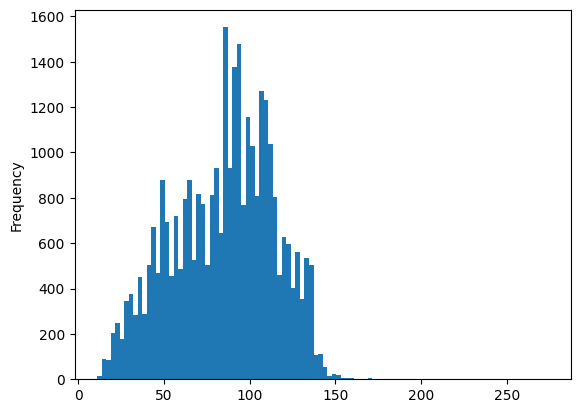

In [17]:
tweets_df['length'].plot(bins = 100, kind = 'hist')

Wordcloud

In [18]:
positive = tweets_df[tweets_df['label']==0]
positive

label                                              tweet  length
0          0   @user when a father is dysfunctional and is s...     102
1          0  @user @user thanks for #lyft credit i can't us...     122
2          0                                bihday your majesty      21
3          0  #model   i love u take with u all the time in ...      86
4          0             factsguide: society now    #motivation      39
...      ...                                                ...     ...
31956      0  off fishing tomorrow @user carnt wait first ti...      61
31957      0  ate @user isz that youuu?ðððððð...      68
31958      0    to see nina turner on the airwaves trying to...     131
31959      0  listening to sad songs on a monday morning otw...      63
31961      0                   thank you @user for you follow        32

[29720 rows x 3 columns]

In [19]:
negative = tweets_df[tweets_df['label']==1]
negative

label                                              tweet  length
13         1  @user #cnn calls #michigan middle school 'buil...      74
14         1  no comment!  in #australia   #opkillingbay #se...     101
17         1                             retweet if you agree!       22
23         1    @user @user lumpy says i am a . prove it lumpy.      47
34         1  it's unbelievable that in the 21st century we'...     104
...      ...                                                ...     ...
31934      1  lady banned from kentucky mall. @user  #jcpenn...      59
31946      1  @user omfg i'm offended! i'm a  mailbox and i'...      82
31947      1  @user @user you don't have the balls to hashta...     112
31948      1   makes you ask yourself, who am i? then am i a...      87
31960      1  @user #sikh #temple vandalised in in #calgary,...      67

[2242 rows x 3 columns]

In [20]:
sentences = tweets_df['tweet'].tolist()
len(sentences)

31962

In [21]:
sentences_as_one_string =" ".join(sentences)

In [22]:
sentences_as_one_string

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run @user @user thanks for #lyft credit i can\'t use cause they don\'t offer wheelchair vans in pdx.    #disapointed #getthanked   bihday your majesty #model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦    factsguide: society now    #motivation [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo    @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦ the next school year is the year for exams.ð\x9f\x98¯ can\'t think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦   @user @user welcome here !  i\'m   it\'s so #gr8 !   â\x86\x9d #ireland consumer price index (mom) climbed from pre

In [23]:
!pip install wordcloud

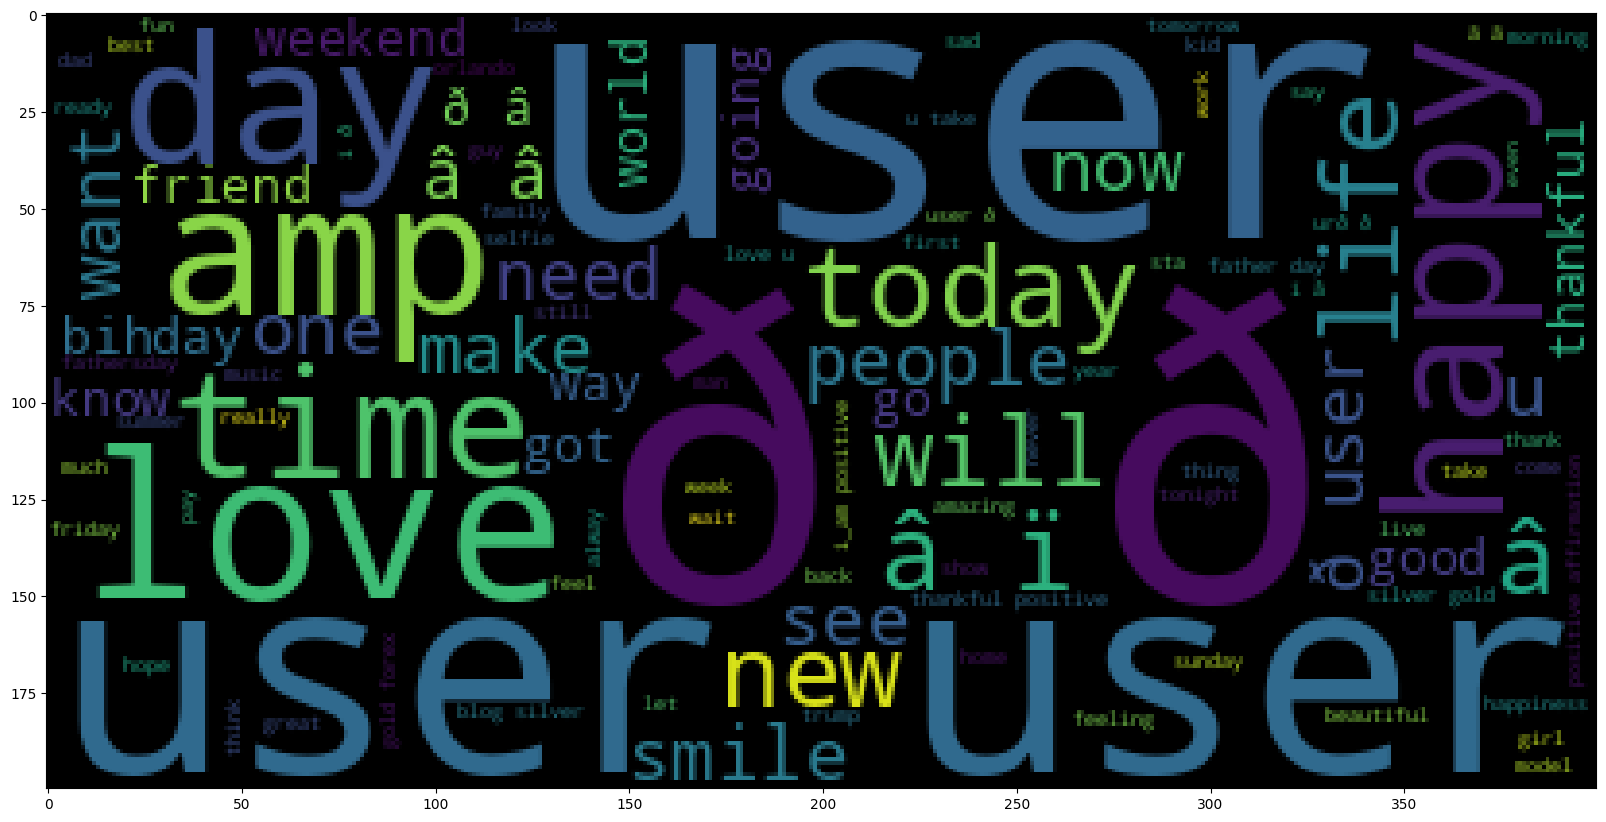

In [24]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

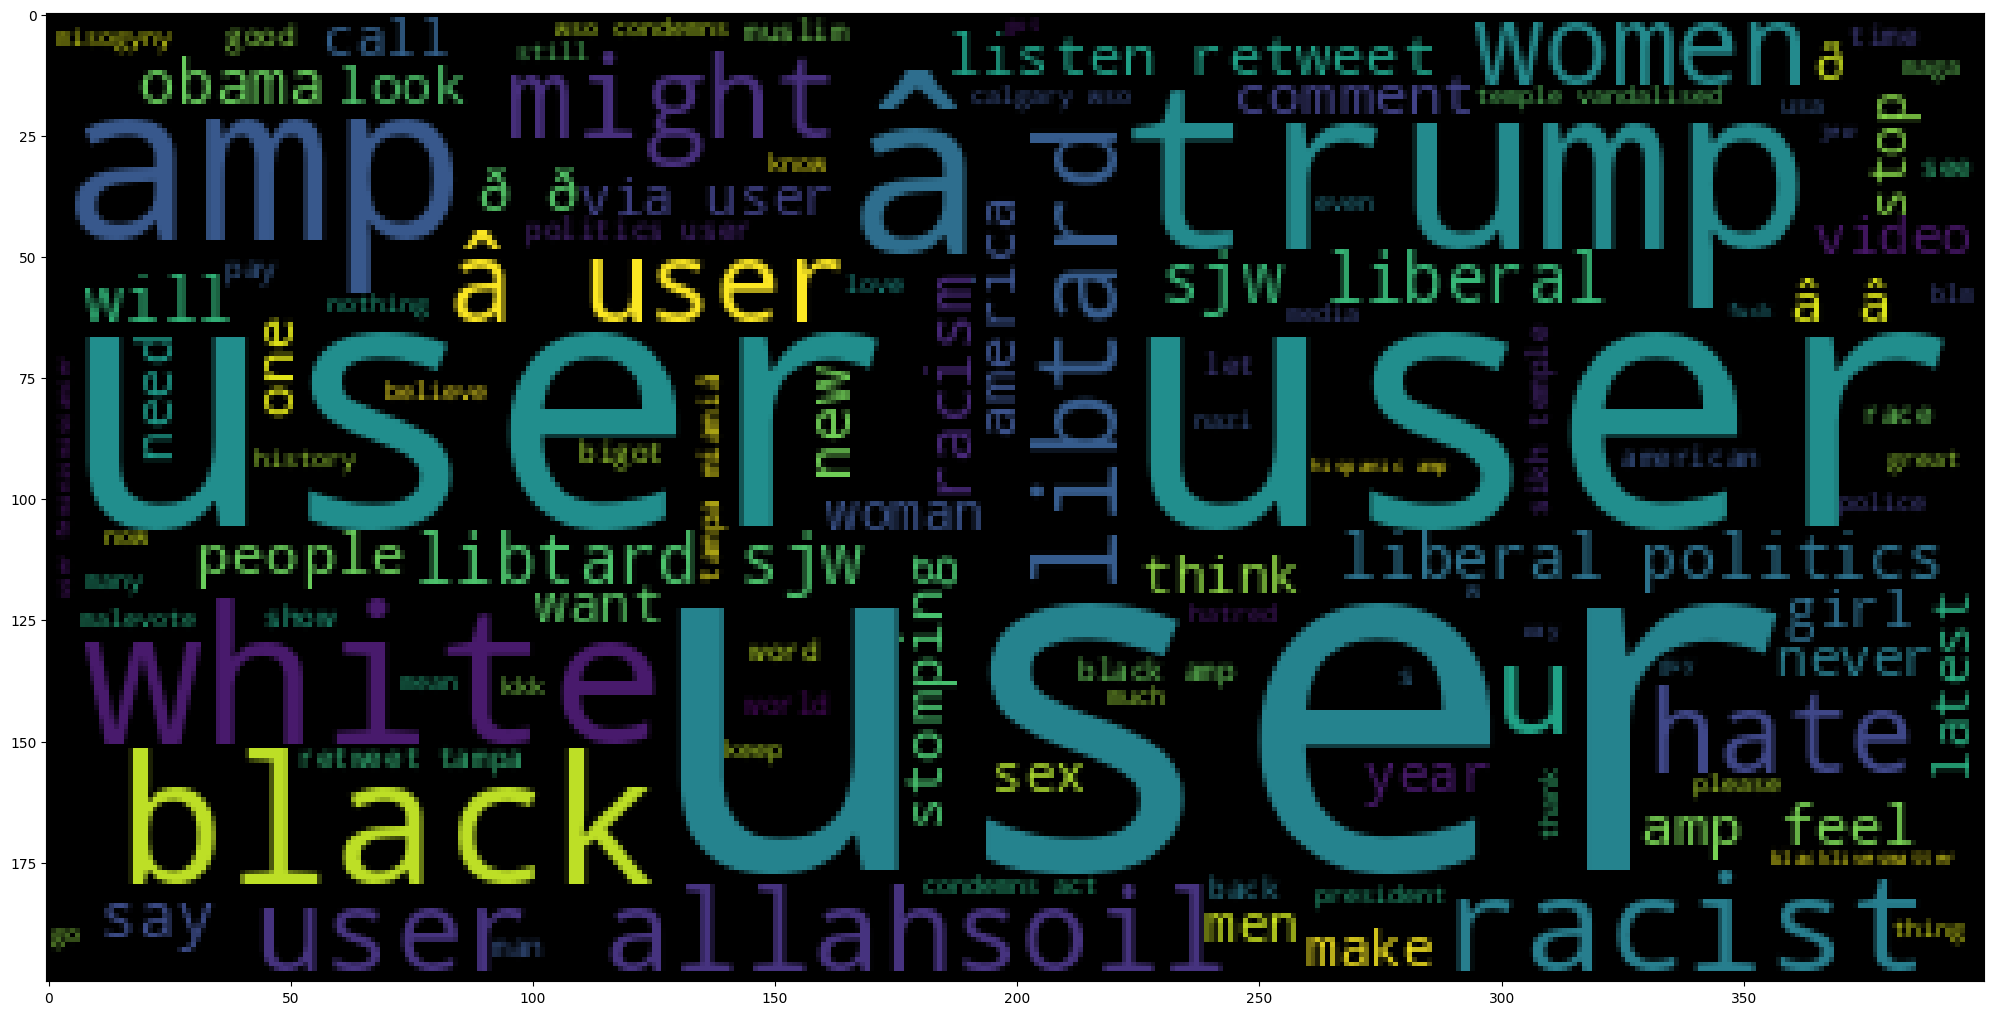

In [25]:
negative_tweets = negative['tweet'].tolist()
negative_sent_as_one = " ".join(negative_tweets)
plt.figure(figsize  =(25,25))
plt.imshow(WordCloud().generate(negative_sent_as_one))


In [26]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
Test = '$I love AI & Machine learning!!'
Test_clean = [char for char in Test if char not in string.punctuation  ]
test_clean_join = ''.join(Test_clean)
test_clean_join

'I love AI  Machine learning'

In [28]:
Test = 'Good morning beautiful people :)... I am having fun learning Machine learning and AI!!'

In [ ]:
Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed

In [30]:
# Join the characters again to form the string.
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'Good morning beautiful people  I am having fun learning Machine learning and AI'

In [ ]:
import nltk # Natural Language tool kit
nltk.download('stopwords')

# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
stopwords.words('english')

In [32]:
 Test_punc_removed_join = 'I enjoy coding, programming and Artificial intelligence'
Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]

In [33]:
Test_punc_removed_join_clean # Only important (no so common) words are left

['enjoy', 'coding,', 'programming', 'Artificial', 'intelligence']

In [34]:
Test_punc_removed_join

'I enjoy coding, programming and Artificial intelligence'

In [35]:
mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations!'

In [36]:
chal = [ char for char in mini_challenge if char not in string.punctuation]
chal = "".join(chal)
chal

'Here is a mini challenge that will teach you how to remove stopwords and punctuations'

In [37]:
cal = [word for word in chal.split() if word.lower() not in stopwords.words('english')]
cal

['mini', 'challenge', 'teach', 'remove', 'stopwords', 'punctuations']

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.','This document is the second paper.','And this is the third one.','Is this the first paper?']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [39]:
print(vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'paper' 'second' 'the' 'third' 'this']


In [40]:
print(X.toarray())

[[0 0 1 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 1 1 0 1]
 [1 0 0 1 1 0 0 1 1 1]
 [0 0 1 1 0 1 0 1 0 1]]


In [41]:
mini_challenge = ['Hello World','Hello Hello World','Hello World world world']

# mini_challenge = ['Hello World', 'Hello Hello Hello World world', 'Hello Hello World world world World']
mini = vectorizer.fit_transform(mini_challenge)
print(mini.toarray())


[[1 1]
 [2 1]
 [1 3]]



Pipeline: punctuations, stopwords, count vectroization

In [42]:
# Let's define a pipeline to clean up all the messages
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [43]:
# Let's test the newly added function
tweets_df_clean = tweets_df['tweet'].apply(message_cleaning)

In [44]:
print(tweets_df_clean[5]) # show the cleaned up version

['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']


In [45]:
print(tweets_df['tweet'][5]) # show the original version

[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  


In [46]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning, dtype = np.uint8)
tweets_countvectorizer = vectorizer.fit_transform(tweets_df['tweet'])

In [47]:
print(vectorizer.get_feature_names_out())


['0' '0000001' '00027' ... 'ó¾°\x80'
 'ó¾°\x80ó¾\x8d\x92ó¾\x86\x9fó¾\x86¤ó¾®\x9fó¾\x92ºó¾®\x9eó¾\x94\x9bó¾\x94\x83ó¾\x95\x86'
 'ó¾°\x80ó¾°\x80ó¾°\x80']


In [48]:
print(tweets_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [49]:
tweets_countvectorizer.shape

(31962, 47386)

In [50]:
X = pd.DataFrame(tweets_countvectorizer.toarray())


In [51]:
X

0      1      2      3      4      5      6      7      8      9      \
0          0      0      0      0      0      0      0      0      0      0   
1          0      0      0      0      0      0      0      0      0      0   
2          0      0      0      0      0      0      0      0      0      0   
3          0      0      0      0      0      0      0      0      0      0   
4          0      0      0      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
31957      0      0      0      0      0      0      0      0      0      0   
31958      0      0      0      0      0      0      0      0      0      0   
31959      0      0      0      0      0      0      0      0      0      0   
31960      0      0      0      0      0      0      0      0      0      0   
31961      0      0      0      0      0      0      0      0      0      0   

       ...  47376  47377  47378  47379  47380  47381  47382  47383  47384  \
0      ...      0      0      0      0      0      0      0      0      0   
1      ...      0      0      0      0      0      0      0      0      0   
2      ...      0      0      0      0      0      0      0      0      0   
3      ...      0      0      0      0      0      0      0      0      0   
4      ...      0      0      0      0      0      0      0      0      0   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
31957  ...      0      0      0      0      0      0      0      0      0   
31958  ...      0      0      0      0      0      0      0      0      0   
31959  ...      0      0      0      0      0      0      0      0      0   
31960  ...      0      0      0      0      0      0      0      0      0   
31961  ...      0      0      0      0      0      0      0      0      0   

       47385  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
31957      0  
31958      0  
31959      0  
31960      0  
31961      0  

[31962 rows x 47386 columns]

In [52]:
y = tweets_df['label']

Training

In [53]:
X.shape

(31962, 47386)

In [54]:
y.shape

(31962,)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
NG_clssifier = MultinomialNB()
NG_clssifier.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_test))

Amazon alexa

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# from jupyterthemes import jtplot
# jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
# setting the style of the notebook to be monokai theme
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them.


In [3]:
# Load the data
reviews_df = pd.read_csv('/content/drive/MyDrive/X sentiment analysis /amazon_reviews.csv')
reviews_df

rating       date         variation  \
0          5  31-Jul-18  Charcoal Fabric    
1          5  31-Jul-18  Charcoal Fabric    
2          4  31-Jul-18    Walnut Finish    
3          5  31-Jul-18  Charcoal Fabric    
4          5  31-Jul-18  Charcoal Fabric    
...      ...        ...               ...   
3145       5  30-Jul-18        Black  Dot   
3146       5  30-Jul-18        Black  Dot   
3147       5  30-Jul-18        Black  Dot   
3148       5  30-Jul-18        White  Dot   
3149       4  29-Jul-18        Black  Dot   

                                       verified_reviews  feedback  
0                                         Love my Echo!         1  
1                                             Loved it!         1  
2     Sometimes while playing a game, you can answer...         1  
3     I have had a lot of fun with this thing. My 4 ...         1  
4                                                 Music         1  
...                                                 ...       ...  
3145  Perfect for kids, adults and everyone in betwe...         1  
3146  Listening to music, searching locations, check...         1  
3147  I do love these things, i have them running my...         1  
3148  Only complaint I have is that the sound qualit...         1  
3149                                               Good         1  

[3150 rows x 5 columns]

In [4]:
# View the DataFrame Information
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [5]:
# View DataFrame Statistical Summary
reviews_df.describe()

rating     feedback
count  3150.000000  3150.000000
mean      4.463175     0.918413
std       1.068506     0.273778
min       1.000000     0.000000
25%       4.000000     1.000000
50%       5.000000     1.000000
75%       5.000000     1.000000
max       5.000000     1.000000

<Axes: xlabel='rating', ylabel='count'>

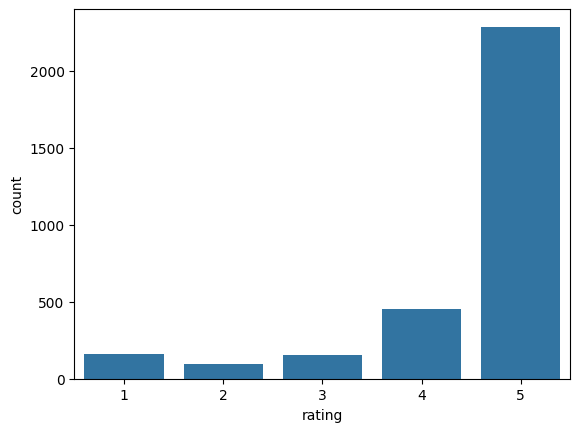

In [6]:
# Plot the count plot for the ratings
sns.countplot(x = reviews_df['rating'])

In [7]:


# Let's get the length of the verified_reviews column
print(reviews_df['verified_reviews'][0])

reviews_df['length'] = reviews_df['verified_reviews'].apply(lambda x: len(str(x)))
# reviews_df['verified_reviews'].apply(len)

Love my Echo!


In [8]:
reviews_df

rating       date         variation  \
0          5  31-Jul-18  Charcoal Fabric    
1          5  31-Jul-18  Charcoal Fabric    
2          4  31-Jul-18    Walnut Finish    
3          5  31-Jul-18  Charcoal Fabric    
4          5  31-Jul-18  Charcoal Fabric    
...      ...        ...               ...   
3145       5  30-Jul-18        Black  Dot   
3146       5  30-Jul-18        Black  Dot   
3147       5  30-Jul-18        Black  Dot   
3148       5  30-Jul-18        White  Dot   
3149       4  29-Jul-18        Black  Dot   

                                       verified_reviews  feedback  length  
0                                         Love my Echo!         1      13  
1                                             Loved it!         1       9  
2     Sometimes while playing a game, you can answer...         1     195  
3     I have had a lot of fun with this thing. My 4 ...         1     172  
4                                                 Music         1       5  
...                                                 ...       ...     ...  
3145  Perfect for kids, adults and everyone in betwe...         1      50  
3146  Listening to music, searching locations, check...         1     135  
3147  I do love these things, i have them running my...         1     441  
3148  Only complaint I have is that the sound qualit...         1     380  
3149                                               Good         1       4  

[3150 rows x 6 columns]

<Axes: ylabel='Frequency'>

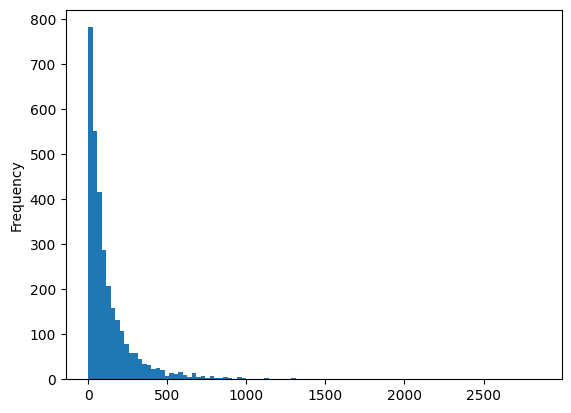

In [9]:
# Plot the histogram for the length
reviews_df['length'].plot(bins=100, kind='hist')

In [10]:
# Apply the describe method to get statistical summary
reviews_df.describe()

rating     feedback       length
count  3150.000000  3150.000000  3150.000000
mean      4.463175     0.918413   132.049206
std       1.068506     0.273778   182.100176
min       1.000000     0.000000     1.000000
25%       4.000000     1.000000    30.000000
50%       5.000000     1.000000    74.000000
75%       5.000000     1.000000   165.000000
max       5.000000     1.000000  2851.000000

<Axes: xlabel='feedback', ylabel='count'>

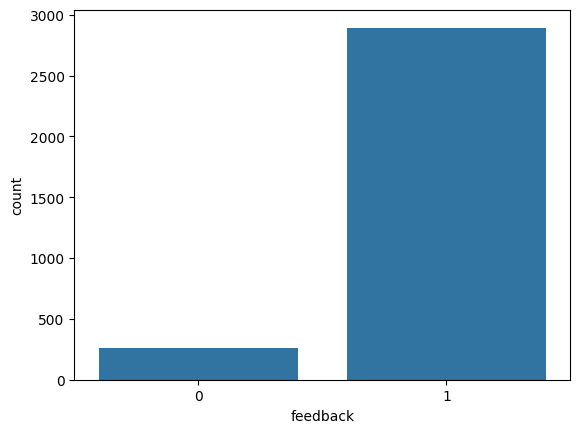

In [11]:
# Plot the countplot for feedback
# Positive ~2800
# Negative ~250
sns.countplot(x = reviews_df['feedback'])

In [12]:
# Obtain only the positive reviews
positive = reviews_df[reviews_df['feedback'] == 1]
positive

rating       date         variation  \
0          5  31-Jul-18  Charcoal Fabric    
1          5  31-Jul-18  Charcoal Fabric    
2          4  31-Jul-18    Walnut Finish    
3          5  31-Jul-18  Charcoal Fabric    
4          5  31-Jul-18  Charcoal Fabric    
...      ...        ...               ...   
3145       5  30-Jul-18        Black  Dot   
3146       5  30-Jul-18        Black  Dot   
3147       5  30-Jul-18        Black  Dot   
3148       5  30-Jul-18        White  Dot   
3149       4  29-Jul-18        Black  Dot   

                                       verified_reviews  feedback  length  
0                                         Love my Echo!         1      13  
1                                             Loved it!         1       9  
2     Sometimes while playing a game, you can answer...         1     195  
3     I have had a lot of fun with this thing. My 4 ...         1     172  
4                                                 Music         1       5  
...                                                 ...       ...     ...  
3145  Perfect for kids, adults and everyone in betwe...         1      50  
3146  Listening to music, searching locations, check...         1     135  
3147  I do love these things, i have them running my...         1     441  
3148  Only complaint I have is that the sound qualit...         1     380  
3149                                               Good         1       4  

[2893 rows x 6 columns]

In [13]:
# Obtain the negative reviews only
negative = reviews_df[reviews_df['feedback'] == 0]
negative

rating       date             variation  \
46         2  30-Jul-18      Charcoal Fabric    
111        2  30-Jul-18      Charcoal Fabric    
141        1  30-Jul-18      Charcoal Fabric    
162        1  30-Jul-18     Sandstone Fabric    
176        2  30-Jul-18  Heather Gray Fabric    
...      ...        ...                   ...   
3047       1  30-Jul-18            Black  Dot   
3048       1  30-Jul-18            White  Dot   
3067       2  30-Jul-18            Black  Dot   
3091       1  30-Jul-18            Black  Dot   
3096       1  30-Jul-18            White  Dot   

                                       verified_reviews  feedback  length  
46    It's like Siri, in fact, Siri answers more acc...         0     163  
111   Sound is terrible if u want good music too get...         0      53  
141                                  Not much features.         0      18  
162   Stopped working after 2 weeks ,didn't follow c...         0      87  
176                                Sad joke. Worthless.         0      20  
...                                                 ...       ...     ...  
3047  Echo Dot responds to us when we aren't even ta...         0     120  
3048              NOT CONNECTED TO MY PHONE PLAYLIST :(         0      37  
3067  The only negative we have on this product is t...         0     240  
3091                                  I didn’t order it         0      17  
3096  The product sounded the same as the emoji spea...         0     210  

[257 rows x 6 columns]

In [14]:
# Convert to list format
sentences = positive['verified_reviews'].tolist()
len(sentences)

2893

In [15]:
# Join all reviews into one large string
sentences_as_one_string =" ".join(sentences)

In [16]:
sentences_as_one_string

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

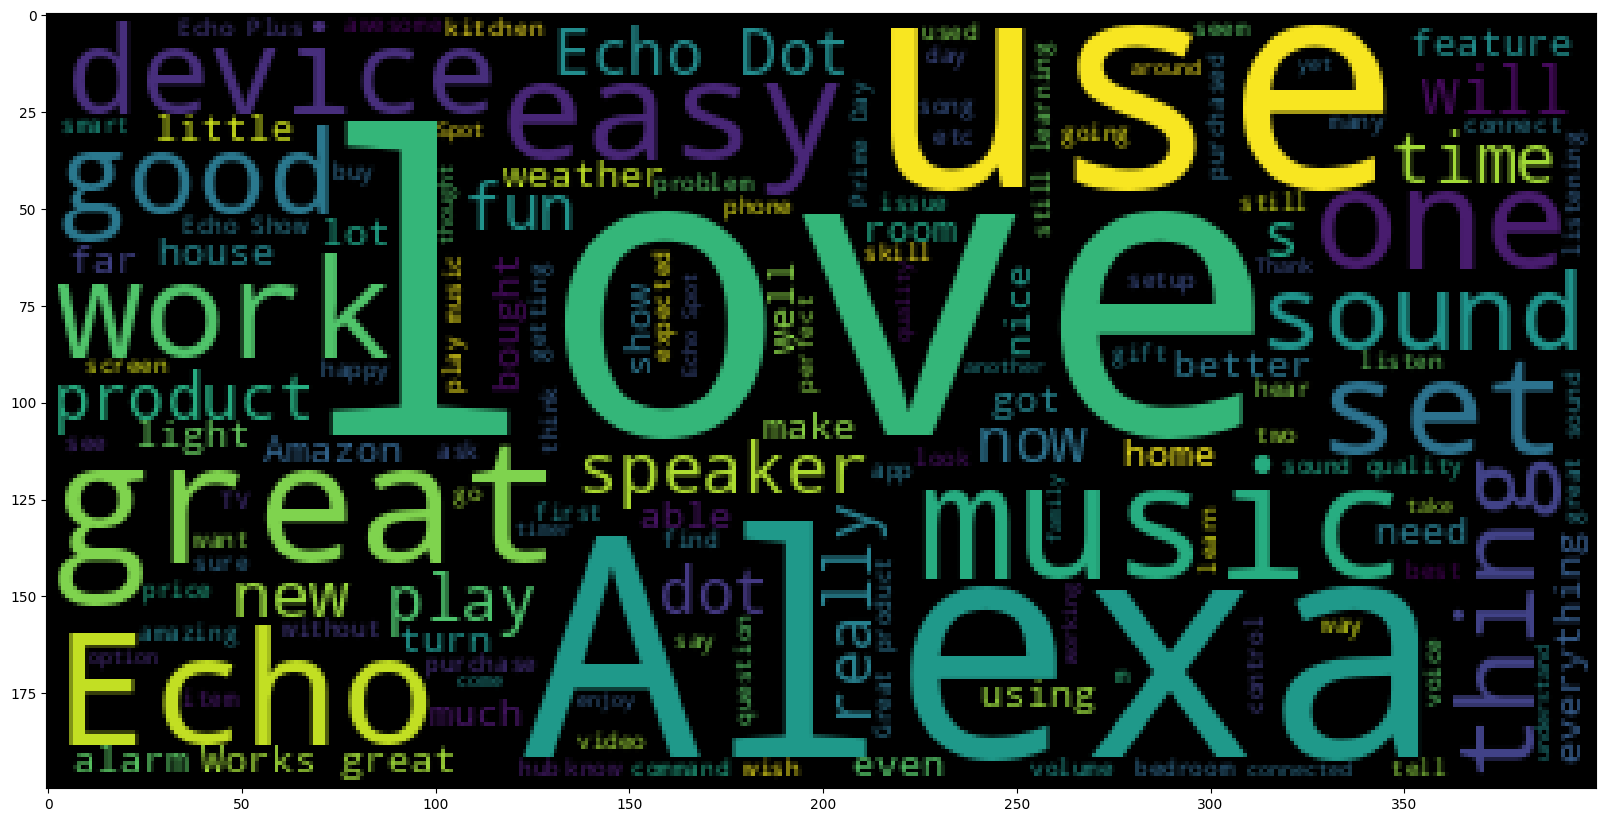

In [17]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

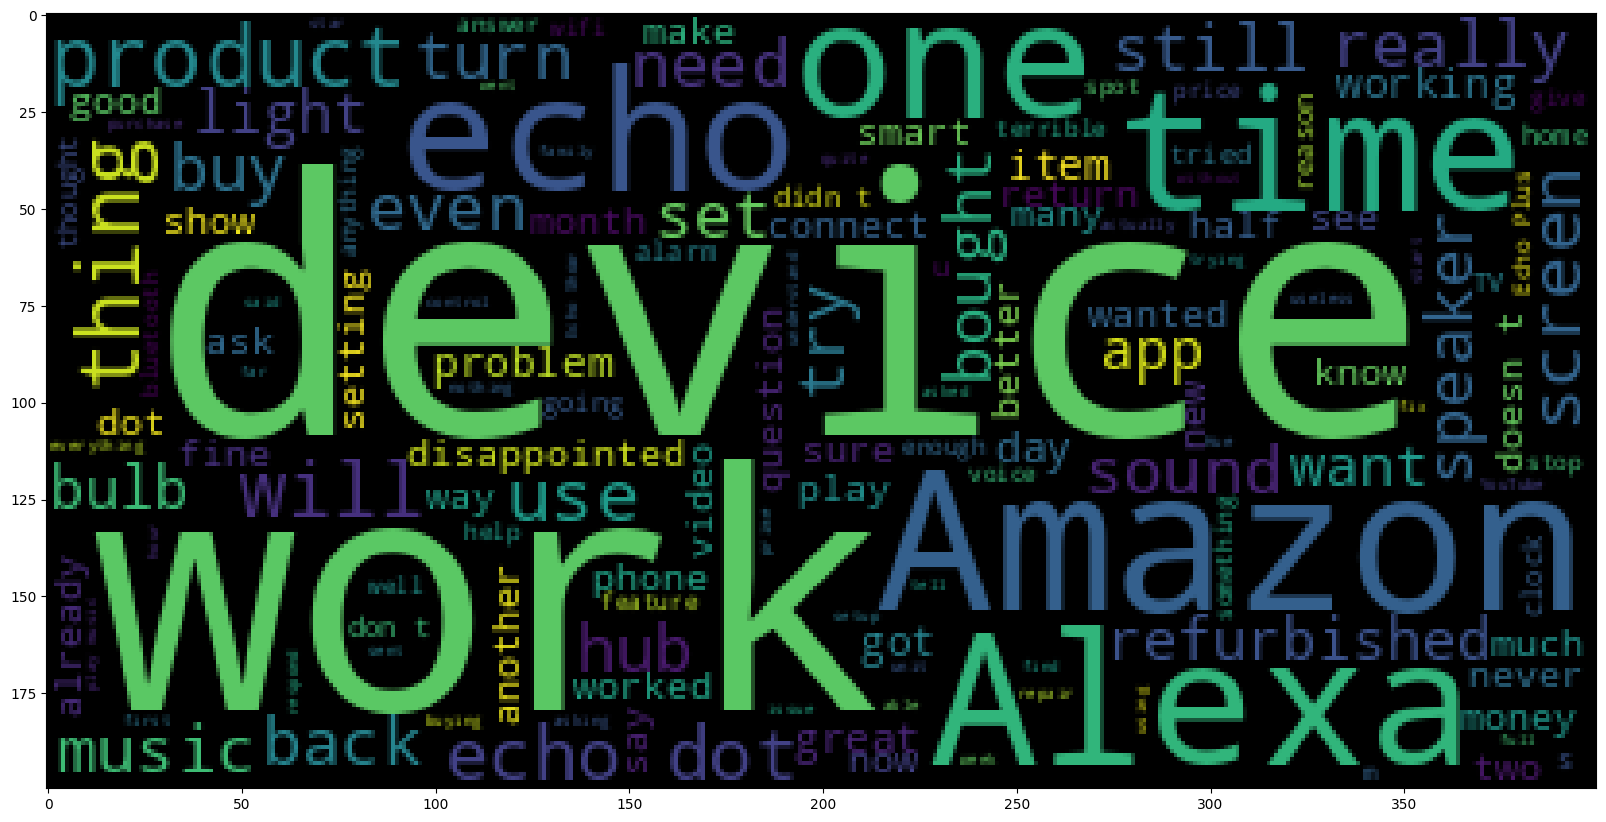

In [18]:
sentences = negative['verified_reviews'].tolist()
len(sentences)
sentences_as_one_string = " ".join([str(s) for s in sentences if not pd.isna(s)])
plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [19]:
# Let's define a pipeline to clean up all the messages
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [23]:
# Let's test the newly added function
import string
string.punctuation
import nltk # Natural Language tool kit
nltk.download('stopwords')

# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
stopwords.words('english')


# reviews_df['length'] = reviews_df['verified_reviews'].apply(lambda x: len(str(x)))
reviews_df_clean = reviews_df['verified_reviews'].apply(lambda x: message_cleaning(str(x)))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
# show the original review
print(reviews_df['verified_reviews'][5])

I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.


In [25]:
# show the cleaned up version
print(reviews_df_clean[5])

['received', 'echo', 'gift', 'needed', 'another', 'Bluetooth', 'something', 'play', 'music', 'easily', 'accessible', 'found', 'smart', 'speaker', 'Can’t', 'wait', 'see', 'else']


In [30]:
reviews_df_clean.isnull().sum()

np.int64(0)

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning)
reviews_df['verified_reviews'] = reviews_df['verified_reviews'].astype(str).fillna("")  #np.isna problem solution
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])


In [34]:
print(vectorizer.get_feature_names_out())

['072318' '1' '10' ... '😬' '😳' '🤓']


In [35]:
print(reviews_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [36]:
reviews_countvectorizer.shape

(3150, 5212)

In [37]:
reviews = pd.DataFrame(reviews_countvectorizer.toarray())

In [38]:
X = reviews

In [39]:
y = reviews_df['feedback']
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [41]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

<Axes: >

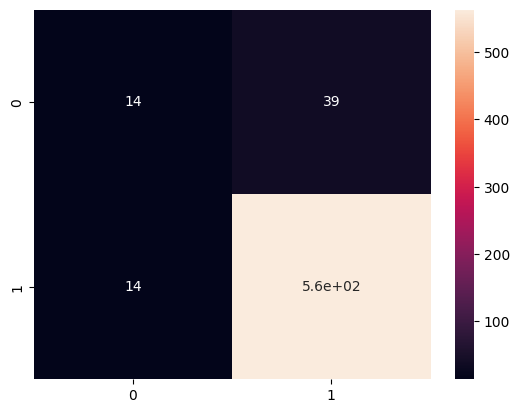

In [43]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [44]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.50      0.26      0.35        53
           1       0.94      0.98      0.96       577

    accuracy                           0.92       630
   macro avg       0.72      0.62      0.65       630
weighted avg       0.90      0.92      0.90       630



              precision    recall  f1-score   support

           0       0.71      0.23      0.34        53
           1       0.93      0.99      0.96       577

    accuracy                           0.93       630
   macro avg       0.82      0.61      0.65       630
weighted avg       0.91      0.93      0.91       630



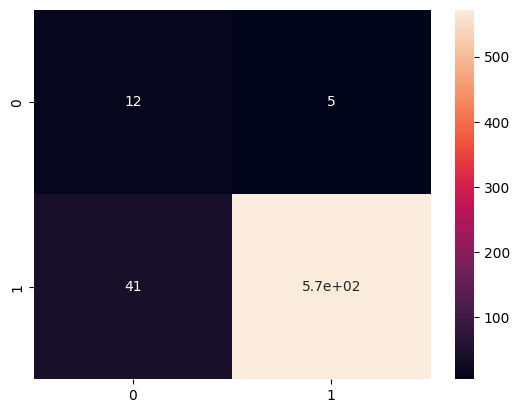

In [45]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.09      0.16        53
           1       0.92      0.99      0.96       577

    accuracy                           0.92       630
   macro avg       0.74      0.54      0.56       630
weighted avg       0.89      0.92      0.89       630



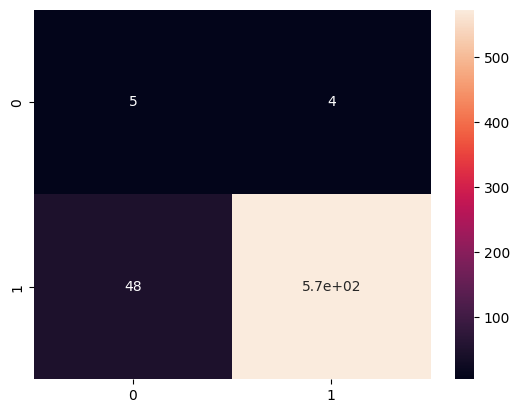

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))